In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

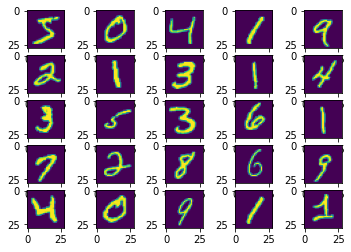

In [33]:
m = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = m.load_data()
x_train,x_test = x_train/200.0, x_test/200.0
y_train, y_test = y_train.flatten(), y_test.flatten()

# To Visualise MNIST dataset
fig,a=plt.subplots(5,5)
k = 0
for i in range(5):
  for j in range(5):
    a[i][j].imshow(x_train[k])
    k=k+1
plt.show()

In [37]:
# To Create LSTM model
K=len(set(y_train))

inputs=Input(shape=(28,28))
layer=LSTM(128,activation="relu")(inputs)
layer=keras.layers.Dense(K,activation="softmax")(layer)
model=keras.models.Model(inputs,layer)

In [38]:
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), epochs=3
)

Epoch 1/3
1875/1875 [==============================] - 57s 30ms/step - loss: 0.4543 - accuracy: 0.8547 - val_loss: 0.1552 - val_accuracy: 0.9547
Epoch 2/3
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1140 - accuracy: 0.9653 - val_loss: 0.0695 - val_accuracy: 0.9794
Epoch 3/3
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0789 - accuracy: 0.9760 - val_loss: 0.0923 - val_accuracy: 0.9721


Prediction results: 5, and targeted results: 5
Prediction results: 0, and targeted results: 0
Prediction results: 4, and targeted results: 4
Prediction results: 3, and targeted results: 3
Prediction results: 8, and targeted results: 8


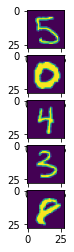

In [39]:
# The Prediction
lab=[0,1,2,3,4,5,6,7,8,9]
imgset=np.random.randint(1000, size=(5))
fig2,a2=plt.subplots(5)
for ind in range(len(imgset)):

  img=imgset[ind]
  a2[ind].imshow(x_test[img])
  n=np.array(x_test[img])
  p=n.reshape(1,28,28,1)
  pre=lab[model.predict(p).argmax()]
  org=lab[y_test[img]]
  
  print(
          "Prediction results: %s, and targeted results: %s" % (pre,org)
      )